# Gradient Descent 

The gradient descent algorithm works by iteratively trying different parameter values until the model with the lowest mean squared error is found. Gradient descent is a commonly used optimization method for other models such as neural networks.

We have a dataset pga.csv containing professional golfers' driving statistics in two columns, accuracy and distance.

   distance  accuracy
0  0.314379 -0.707727
1  1.693777 -1.586669
2 -0.059695 -0.176699
3 -0.574047  0.372640
4  1.343083 -1.934584


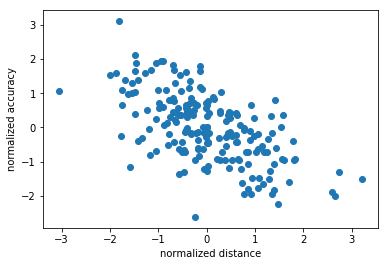

In [129]:
import pandas
import matplotlib.pyplot as plt

# Read data from csv
pga = pandas.read_csv("data/pga.csv")

# Normalize the data
pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()
print(pga.head())

plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.show()

## Representing the cost function

cost(0, 1, pga.distance, pga.accuracy): 1.5994384226


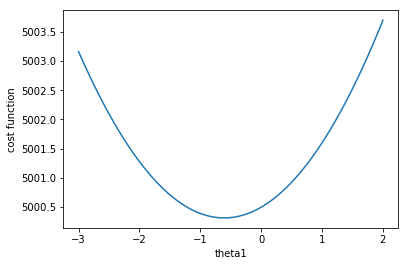

In [121]:
import matplotlib.pyplot as plt

def compute_cost(X, y, theta):
    '''
    Compute cost for linear regression
    X: matrice m x n including a column of 1s for the bias
    y: m x 1
    theta: (1, n)
    '''
    #Number of training samples
    n = X.shape[1]
    m = X.shape[0]

    predictions = np.dot(X, theta)
    sqErrors = (predictions - y) ** 2
    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J

# The cost for theta0=0 and theta1=1.
theta = np.array([0, 1])
y = pga.accuracy
m = y.size
X = pga.distance[:, np.newaxis]
X = np.append(np.ones([m, 1], dtype=np.int32), X, axis=1)
y = y[:, np.newaxis]
print("cost(0, 1, pga.distance, pga.accuracy):", compute_cost(X, y, theta[:, np.newaxis]))

theta0 = 100
theta1s = np.linspace(-3,2,100)

costs = []
for theta1 in theta1s:
    theta = np.array([theta0, theta1])
    costs.append(compute_cost(X, y, theta[:, np.newaxis]))

plt.plot(theta1s, costs)
plt.xlabel('theta1')
plt.ylabel('cost function')
plt.show()

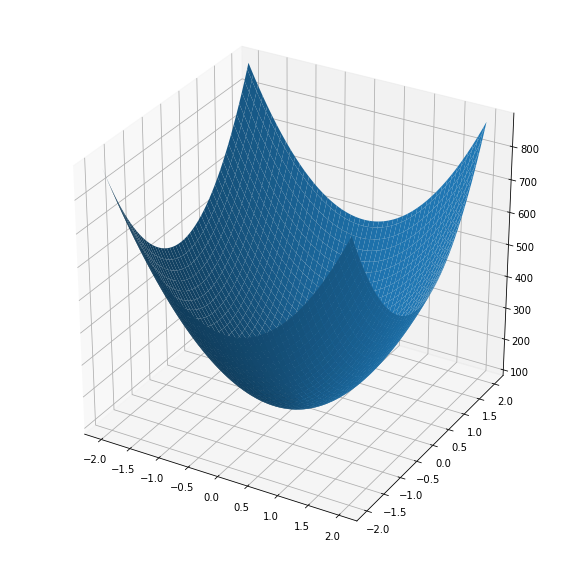

In [123]:
# Plotting the cost in function of theta0 and Theta1 (3Dim plot):

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

theta0s = np.linspace(-2,2,100)
theta1s = np.linspace(-2,2, 100)
# np.meshgrid will build a coordinate matrices of x and y
COST = np.empty(shape=(100,100))
T0, T1 = np.meshgrid(theta0s,theta1s)

for i in range(100):
    for j in range(100):
        COST[i, j] = compute_cost(X, y, np.array([T0[i, j], T1[i, j]]))
# Open a figure to place the plot on
fig1 = plt.figure(figsize=(10, 10))
# Initialize 3D plot
ax = fig1.gca(projection='3d')
# Plot the surface
ax.plot_surface(X=T0,Y=T1,Z=COST)
plt.show()

In [119]:
def partial_cost(X, y, theta):
    '''
    Compute cost for linear regression
    X: matrice m x n including a column of 1s for the bias
    y: m x 1
    theta: (n, 1)
    '''
    m = X.shape[0]
    h = np.dot(X, theta)
    diff = np.dot(np.transpose(X), (h - y))
    return diff/m
theta = np.array([0, 5])
print(partial_cost(X, y, theta[:, np.newaxis]))


[[  7.24068295e-14]
 [  5.57913385e+00]]


(2, 1)
theta0: 1.40739084233e-14
theta1: -0.604698316638


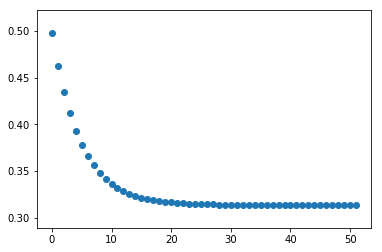

In [124]:
def gradient_descent(X, y, alpha=0.1, theta = np.array([0., 0.])[:, np.newaxis]):
    max_epochs = 1000 # Maximum number of iterations.
    counter = 0 # Intialize a counter.
    print(theta.shape)
    c = compute_cost(X, y, theta)  # Initial cost.
    costs = [c] # Lets store each update.
    # Set a convergence threshold to find where the cost function in minimized.
    # When the difference between the previous cost and current cost
    # is less than this value we will say the parameters converged.
    convergence_thres = 0.000001  
    cprev = c + 10   
    thetas = [theta]

    # When the costs converge or we hit a large number of iterations will we stop updating.
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        # Alpha times the partial deriviative is our updated
        update = alpha * partial_cost(X, y, theta)
        
        # Update theta0 and theta1 at the same time.
        # We want to compute the slopes at the same set of hypothesised parameters
        # so we update after finding the partial derivatives.
        theta -= update
        
        
        # Store thetas.
        thetas.append(theta)

        
        # Compute the new cost.
        c = compute_cost(X, y, theta)

        # Store updates.
        costs.append(c)
        counter += 1

    return {'theta': theta, "costs": costs}
gradients = gradient_descent(X,y)
print('theta0:', gradients['theta'][0, 0])
print('theta1:', gradients['theta'][1, 0])
costs = gradients['costs']
plt.scatter(range(len(costs)),  costs)
plt.show()




Debugging gradient descent: We just plotted the cost function, J(θ) over the number of iterations of gradient descent. If J(θ) ever increases, then you probably need to decrease α.

Automatic convergence test. Declare convergence if J(θ) decreases by less than the convergence threshold (here, 0.000001, it could have been 1E-3) in one iteration. However in practice it's difficult to choose this threshold value.

We chose α = 0.1:

* If α is too small: slow convergence.

* If α is too large: ￼may not decrease on every iteration and thus may not converge.


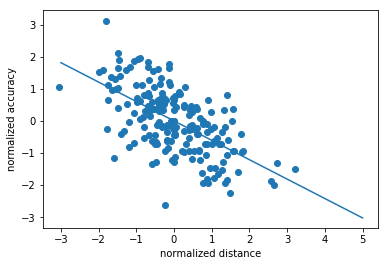

In [136]:
plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.plot([-3,5],[-0.604*-3,-0.604*5])
plt.show()

We can use the linear regression model to end up with similar results

In [131]:
from sklearn.linear_model import LinearRegression
import numpy as np

# The X variable in LinearRegression.fit() must have 2 dimensions
lr = LinearRegression()
lr.fit(pga.distance[:, np.newaxis], pga.accuracy)
theta0 = lr.intercept_
theta1 = lr.coef_[0]
print("theta0:", theta0)
print("theta1:", theta1)

theta0: 1.44099746415e-14
theta1: -0.607598822715


In [140]:
import seaborn as sns
sns.regplot('distance', 'accuracy', data=pga)